# 1. Import Necessary libraries

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [3]:
daily_temp = pd.read_csv('daily-minimum-temperatures.csv')
daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


# 3. Data Understanding

In [4]:
daily_temp.shape

(3650, 2)

In [5]:
daily_temp.isna().sum()

Date    0
Temp    0
dtype: int64

In [6]:
daily_temp.dtypes

Date     object
Temp    float64
dtype: object

### Visualizing the Daily Temperature

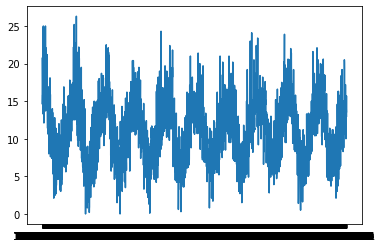

In [10]:
plt.plot(daily_temp['Date'],daily_temp['Temp'])
plt.title('')
plt.show()

In [12]:
daily_temp['Date'] = pd.to_datetime(daily_temp['Date'])

In [13]:
daily_temp.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

## 3.1 Daily Temperature Fluctuations between 1981 - 1991

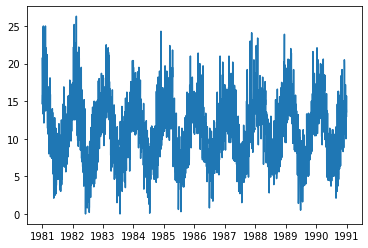

In [15]:
plt.plot(daily_temp['Date'],daily_temp['Temp'])
plt.show()

## 3.2 Temperature Fluctuations

<AxesSubplot:xlabel='Temp', ylabel='Density'>

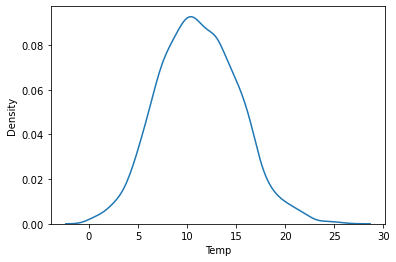

In [17]:
import seaborn as sns
sns.kdeplot(daily_temp['Temp'])

## 3.3 Creating a Boxplot of yearly data

In [19]:
daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [20]:
daily_temp.index

RangeIndex(start=0, stop=3650, step=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9ee6423a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9ee5a1bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9ef7ff610>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9eac24c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9ec155d30>],
 'means': []}

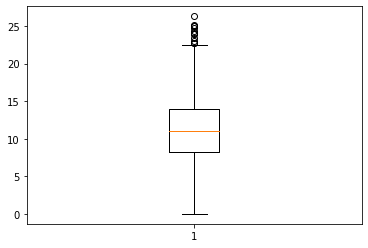

In [22]:
plt.boxplot(daily_temp['Temp'])

<AxesSubplot:>

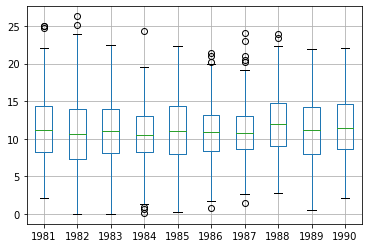

In [46]:
from pandas import Grouper
from pandas import DataFrame
daily_temp = pd.read_csv('daily-minimum-temperatures.csv',index_col=0,parse_dates=True,squeeze=True)
groups = daily_temp.groupby(Grouper(freq='A')) #year-end frequency
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()

### LagPlot

In [47]:
daily_temp

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

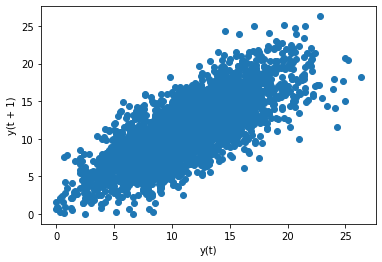

In [51]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(daily_temp,lag=1)
plt.show()

### Observation:

**There is a good correlation between previous day temperature with current day temperature.**

## ACF - AutoCorrelation Function plot

<Figure size 2880x720 with 0 Axes>

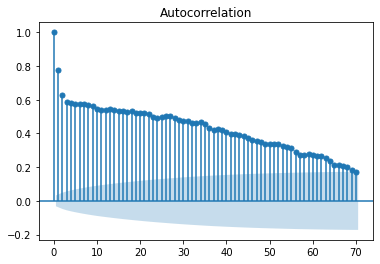

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (40,10))
plot_acf(daily_temp,lags=70)
plt.show()

# THE END!!!